# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

## Question 1 & 2

In [58]:
import pandas as pd
df = pd.read_csv('./data/college_completion.csv',low_memory=False)

df.head()


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [59]:
df.shape

(3798, 63)

## Question 3

In [60]:
cross_tab = pd.crosstab(df['control'], df['level'])
print(cross_tab, '\n')
print(pd.crosstab(df['control'],df['level'], normalize = 'all'),'\n')

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



The cross-tabulation of `control` and `level` reveals distinct patterns among different types of institutions. Private for-profit institutions have a relatively balanced distribution between 2-year and 4-year programs, with 465 and 527 programs respectively. In contrast, private not-for-profit institutions predominantly offer 4-year programs, accounting for 1180 programs, while only having 68 2-year programs. Public institutions, on the other hand, have a higher proportion of 2-year programs (926) compared to 4-year programs (632). When looking at the normalized counts, private for-profit institutions account for approximately 12.24% of 2-year programs and 13.88% of 4-year programs. Private not-for-profit institutions account for about 1.79% of 2-year programs and 31.07% of 4-year programs. Public institutions represent approximately 24.38% of 2-year programs and 16.64% of 4-year programs. These patterns suggest that private not-for-profit institutions focus more on 4-year programs, while public institutions have a significant presence in 2-year programs. Private for-profit institutions maintain a more balanced distribution between the two levels.

## Question 4

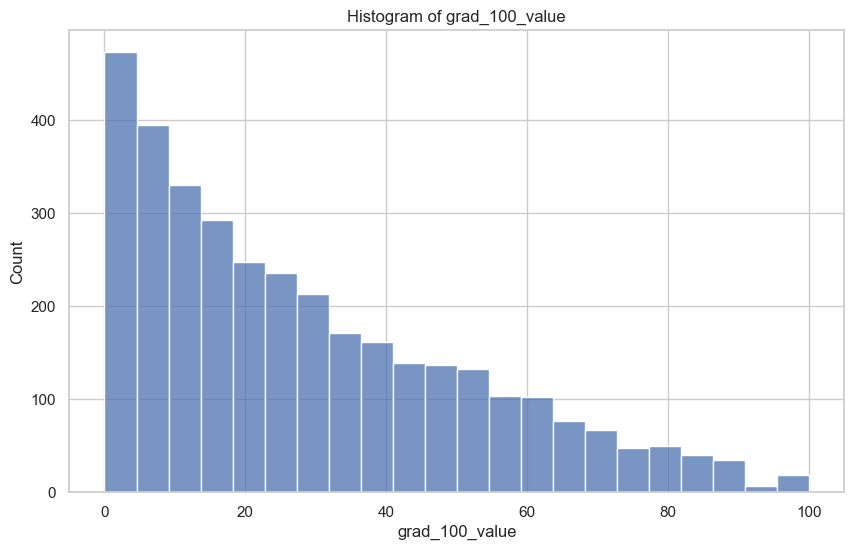

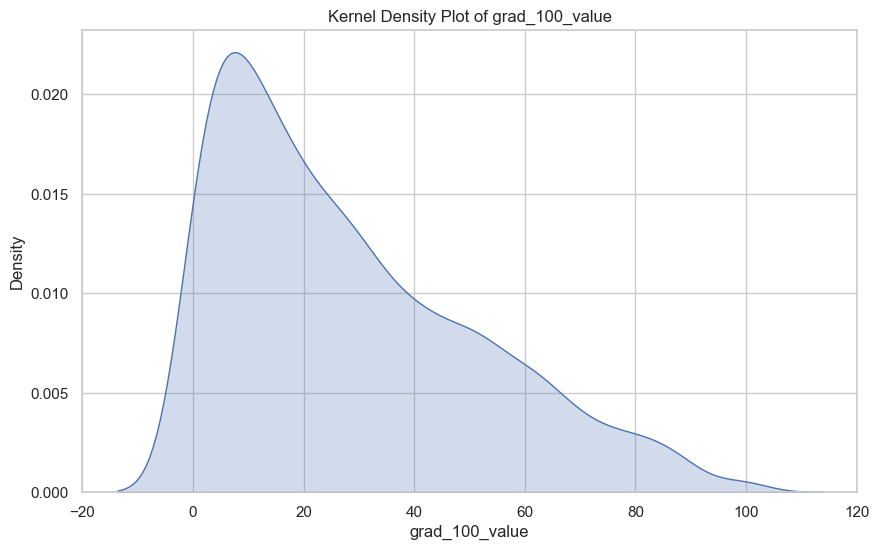

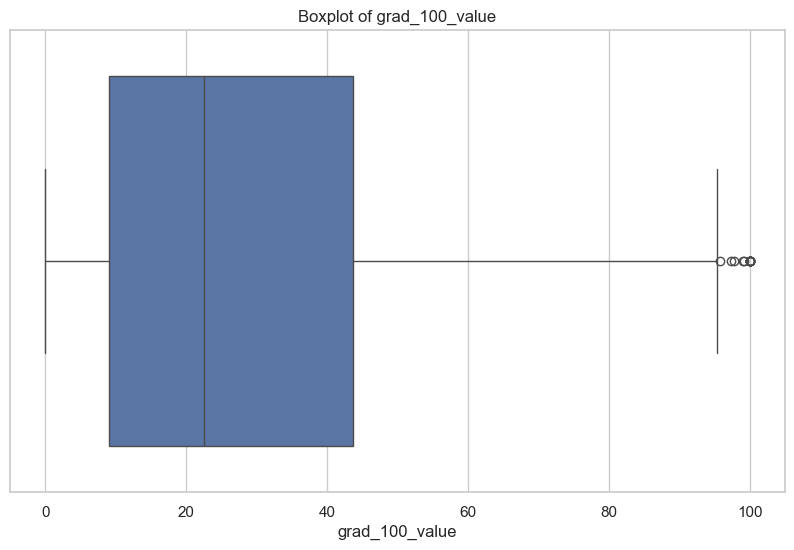

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['grad_100_value'])
plt.title('Histogram of grad_100_value')
plt.xlabel('grad_100_value')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(df['grad_100_value'], fill=True)
plt.title('Kernel Density Plot of grad_100_value')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['grad_100_value'])
plt.title('Boxplot of grad_100_value')
plt.xlabel('grad_100_value')
plt.show()

print(df['grad_100_value'].describe())


## Question 5

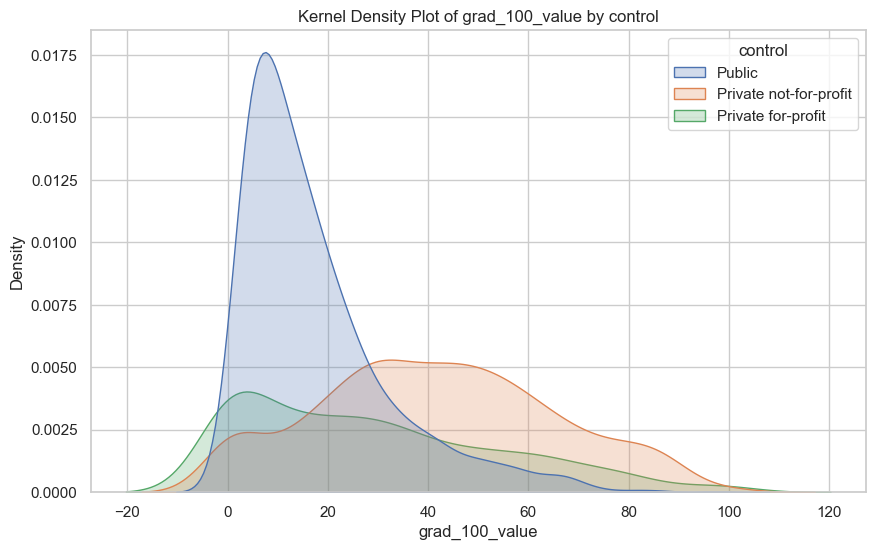

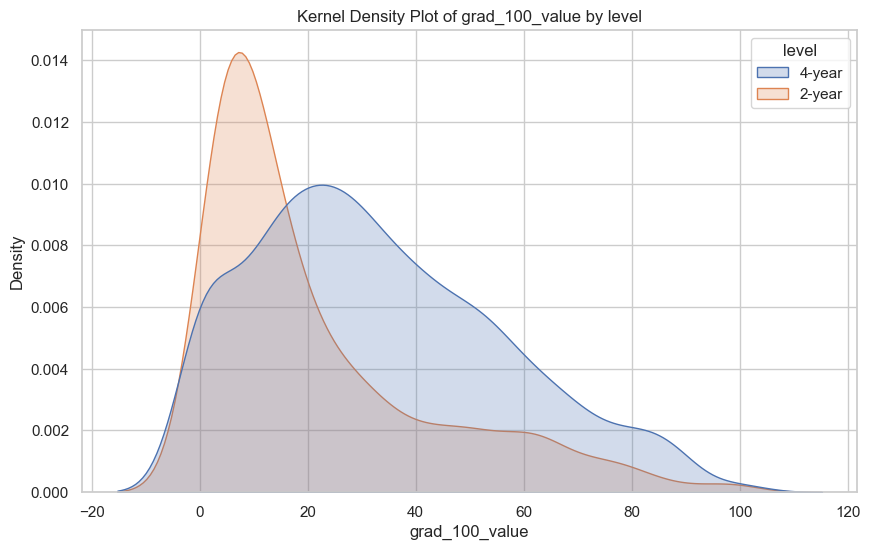

                         count       mean        std  min    25%   50%    75%  \
control                                                                         
Private for-profit       779.0  29.108858  25.601687  0.0   6.95  24.7  46.75   
Private not-for-profit  1189.0  41.660976  23.551231  0.0  25.00  41.0  58.30   
Public                  1499.0  17.430887  14.729443  0.0   6.90  13.2  23.25   

                          max  
control                        
Private for-profit      100.0  
Private not-for-profit  100.0  
Public                   97.8  
         count       mean        std  min   25%   50%     75%    max
level                                                               
2-year  1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year  2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0


In [62]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='control', fill=True)
plt.title('Kernel Density Plot of grad_100_value by control')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='level', fill=True)
plt.title('Kernel Density Plot of grad_100_value by level')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()

grouped_control = df.groupby('control')['grad_100_value'].describe()
grouped_level = df.groupby('level')['grad_100_value'].describe()
print(grouped_control)
print(grouped_level)


Private not-for-profit institutions have the highest average graduation rate at 41.66%, with a wide distribution, indicating a broad range of performance. Private for-profit institutions follow with an average of 29.11%, while public institutions have the lowest mean graduation rate at 17.43%. When comparing by institution level, 4-year institutions show higher graduation rates (mean of 33.23%) compared to 2-year institutions (mean of 21.64%). Overall, private not-for-profit and 4-year institutions tend to have the best graduation rates.

## Question 6

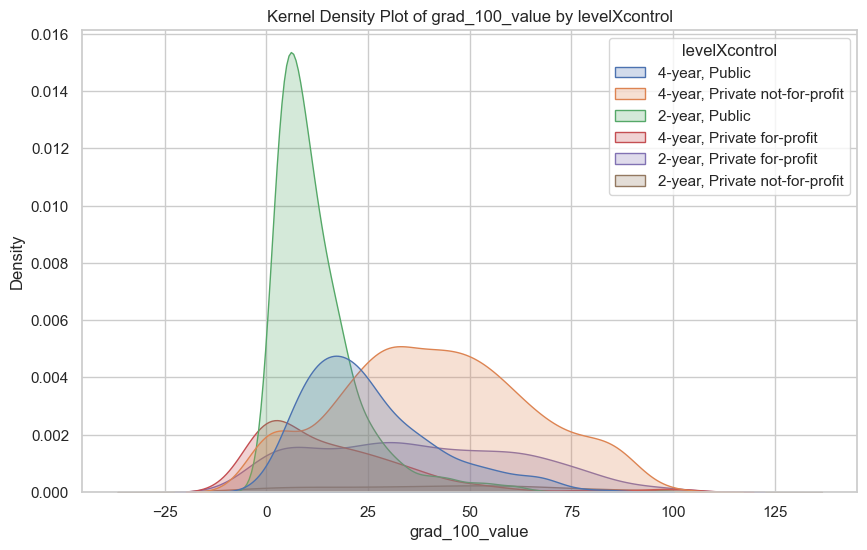

In [63]:
df['levelXcontrol'] = df['level'] + ', ' + df['control']

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', fill=True)
plt.title('Kernel Density Plot of grad_100_value by levelXcontrol')
plt.xlabel('grad_100_value')
plt.ylabel('Density')
plt.show()


In [64]:
df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

From this data, Private not-for-profit 2-year institutions have the highest average graduation rate at 41.91%, followed closely by Private not-for-profit 4-year institutions at 41.65%. Both of these institution types also have high median graduation rates (44.4% for 2-year and 41.0% for 4-year), indicating consistency across their students. 

In contrast, Public 2-year institutions have the lowest average graduation rate at 12.40%, with a lower median of 9.4%, suggesting a significant difference in performance. Private for-profit 4-year institutions also perform poorly, with a mean graduation rate of only 17.38%.

Thus, Private not-for-profit institutions—whether 2-year or 4-year—tend to have the best graduation rates overall.

## Question 7

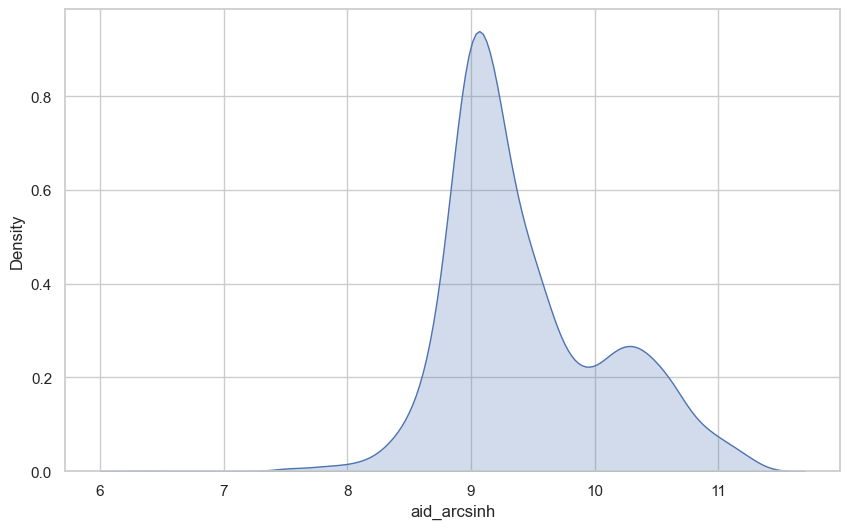

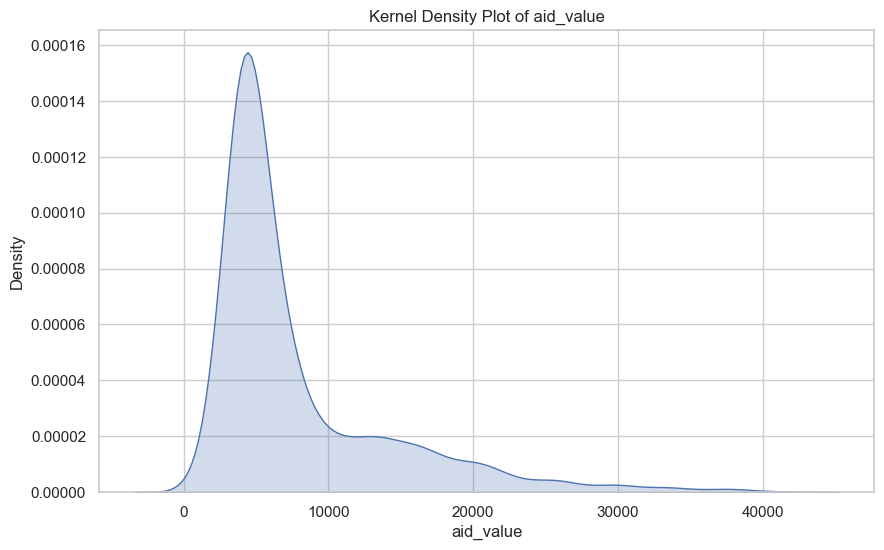

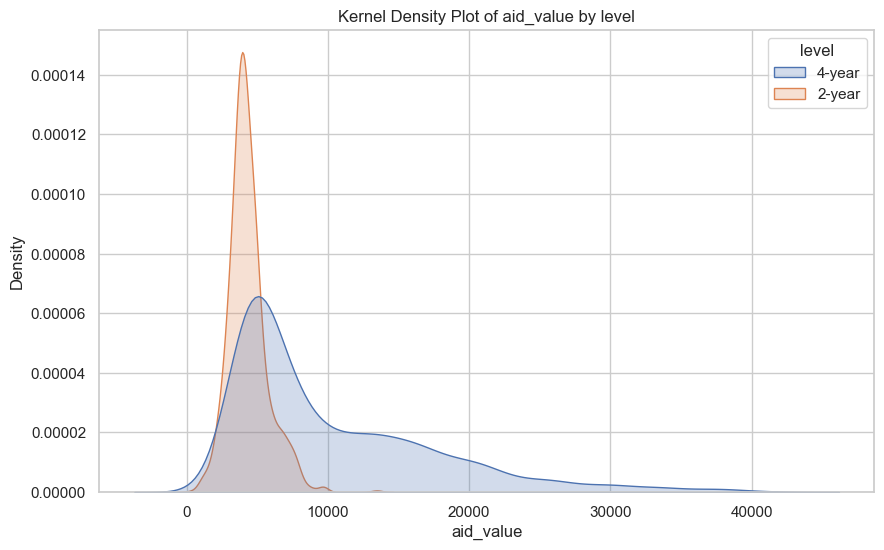

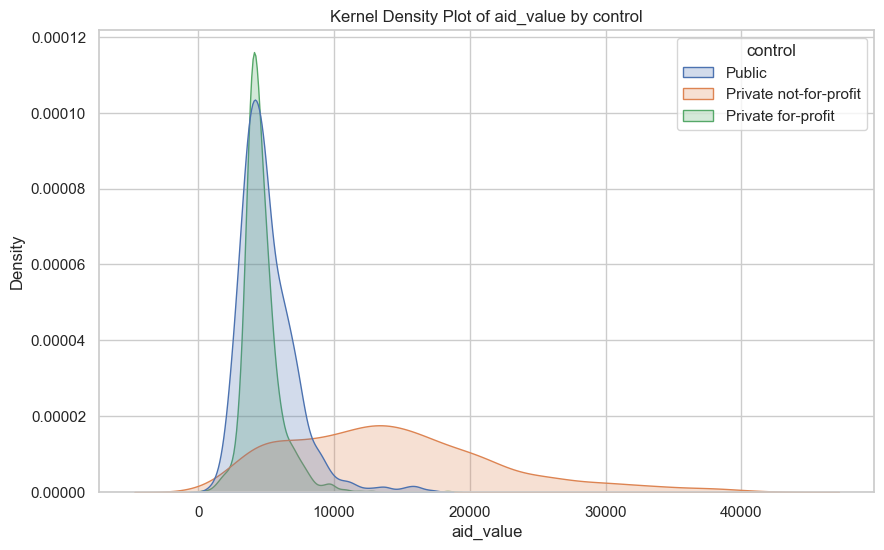

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [65]:
import numpy as np
df['aid_arcsinh'] = np.arcsinh(df['aid_value'])
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df,x='aid_arcsinh', fill=True) 
plt.xlabel('aid_arcsinh')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(df['aid_value'], fill=True)
plt.title('Kernel Density Plot of aid_value')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='aid_value', hue='level', fill=True)
plt.title('Kernel Density Plot of aid_value by level')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='aid_value', hue='control', fill=True)
plt.title('Kernel Density Plot of aid_value by control')
plt.xlabel('aid_value')
plt.ylabel('Density')
plt.show()

df.loc[:,['control','aid_value']].groupby('control').describe()


In [66]:
df.loc[:,['level','aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

The shape of the graph can be explained by the differences in financial aid distribution across institution types (control) and program levels (2-year vs. 4-year). Private for-profit institutions have lower average aid values with less variability compared to private not-for-profit institutions, which exhibit the highest mean and the widest range of aid, indicating greater variability in aid distribution. Public institutions fall between these two, with moderate average aid and variability. Similarly, 2-year institutions offer lower and more consistent aid, while 4-year institutions show significantly higher average aid values and a broader distribution, reflecting a wider range of financial aid options. This can be seen on the last two graphs.

## Question 8

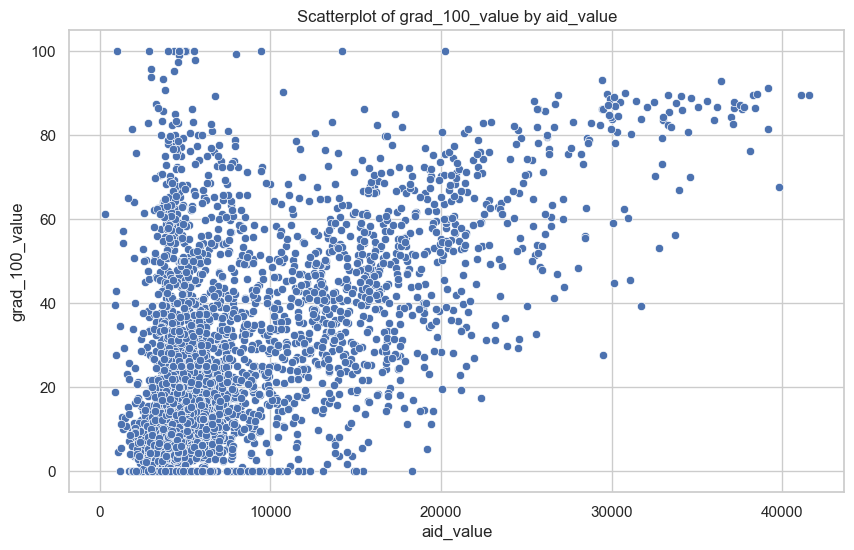

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='aid_value', y='grad_100_value', data=df)
plt.title('Scatterplot of grad_100_value by aid_value')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.show()



There's a cluster of points where there seems to be a positive linear correlation between the x and y value. Additionally, there seems to be another set of points where there is a positive upwards growth in the y axis but not necessarily the x axis.


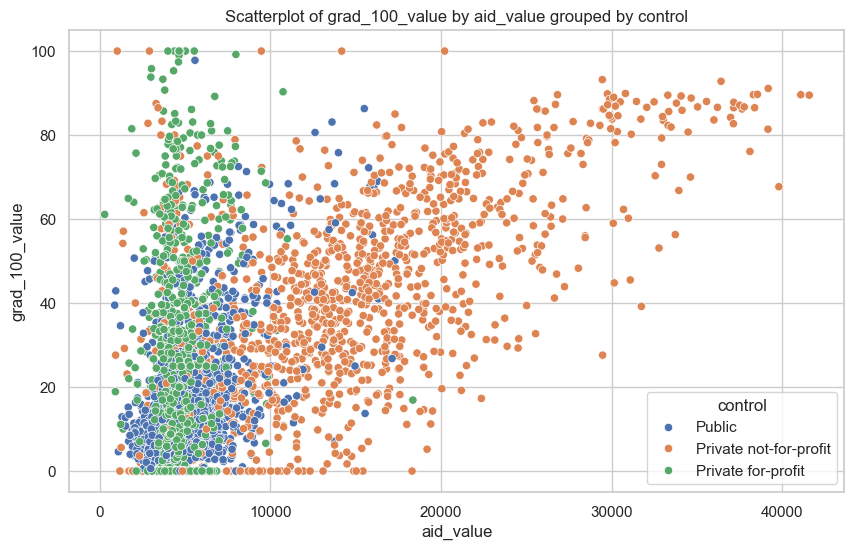

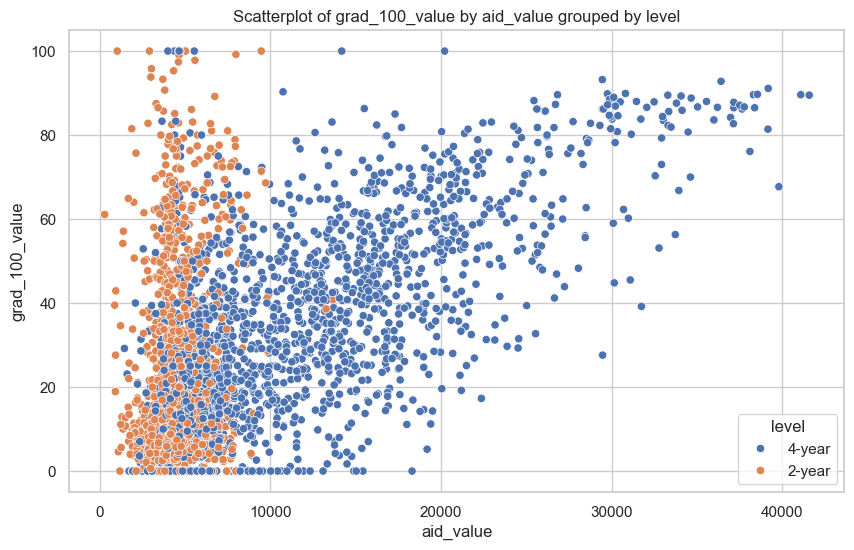

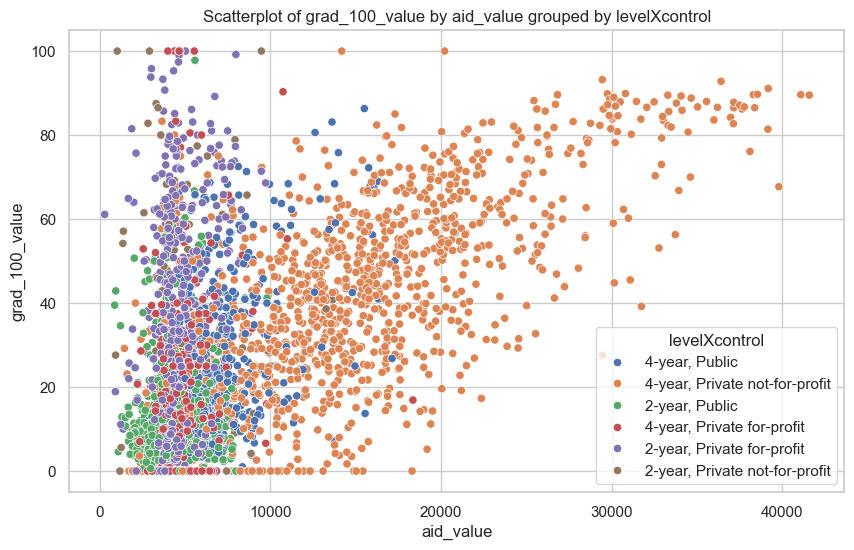

In [68]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='aid_value', y='grad_100_value', hue='control', data=df)
plt.title('Scatterplot of grad_100_value by aid_value grouped by control')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='aid_value', y='grad_100_value', hue='level', data=df)
plt.title('Scatterplot of grad_100_value by aid_value grouped by level')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='levelXcontrol')
plt.title('Scatterplot of grad_100_value by aid_value grouped by levelXcontrol')
plt.xlabel('aid_value')
plt.ylabel('grad_100_value')
plt.show()


It seems like there's a positive linear correlation between aid and graduation rate in 4-year private not-for-profit institutions. 

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [69]:
import pandas as pd
df = pd.read_csv('./data/COVID-19 Nursing Home Data 09.15.2024.csv',low_memory=False)

df.head()



,Week Ending,Federal Provider Number,Provider Name,Provider Address,Provider City,Provider State,Provider Zip Code,Provider Phone Number,County,Submitted Data,...,"Total Resident COVID-19 Deaths Per 1,000 Residents","Number of Residents who are Up to Date on COVID-19 Vaccinations, 14 Days or More Before Positive Test",Number of Residents Staying in this Facility for At Least 1 Day This Week,Number of All Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week,Number of Residents Staying in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Residents Up to Date with COVID-19 Vaccines,Percentage of Current Residents Up to Date with COVID-19 Vaccines,Number of Healthcare Personnel Eligible to Work in this Facility for At Least 1 Day This Week Up to Date with COVID-19 Vaccines,Recent Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines,Percentage of Current Healthcare Personnel Up to Date with COVID-19 Vaccines
0,05/24/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,88.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/31/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,95.24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06/07/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06/14/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,93.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06/21/20,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,Franklin,Y,...,88.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 3

The data dictionary does not document how missing values are handled, but from just from looking at the data frame printed above, for the numeric variables, it describes missing values or undefined as NaN. 

## Question 4

I chose these variables: 
- **Residents Weekly Confirmed COVID-19:** This variable shows the number of new confirmed COVID-19 cases among residents each week. It helps us understand the trend of new infections over time.
- **Residents Total Confirmed COVID-19:** This variable shows the total number of confirmed COVID-19 cases among residents. It provides a sense of the overall impact of the pandemic on the resident population.
- **Residents Weekly COVID-19 Deaths:** This variable shows the number of COVID-19 related deaths among residents each week. It helps us understand the trend of COVID-19 related mortality.
- **Residents Total COVID-19 Deaths:** This variable shows the cumulative number of COVID-19 related deaths among residents. It provides a sense of the overall impact of COVID-19 on mortality.

These variables are jointly interesting because they allow us to analyze the trends and impact of COVID-19 on both infection rates and mortality among residents. By comparing weekly and total numbers, we can gain insights into how the situation has evolved over time.

In [70]:
import pandas as pd

df = pd.read_csv('./data/COVID-19 Nursing Home Data 09.15.2024.csv', low_memory=False)

df.head()

columns_of_interest = [
    'Residents Weekly Confirmed COVID-19',
    'Residents Total Confirmed COVID-19',
    'Residents Weekly COVID-19 Deaths',
    'Residents Total COVID-19 Deaths'
]

df_selected = df[columns_of_interest]

df_selected.columns = [
    'Weekly Confirmed COVID-19',
    'Total Confirmed COVID-19',
    'Weekly COVID19 Deaths',
    'Total COVID19 Deaths'
]

df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

df_selected = df_selected.fillna(0)

df_selected.head()


,Weekly Confirmed COVID-19,Total Confirmed COVID-19,Weekly COVID19 Deaths,Total COVID19 Deaths
0,45.0,45.0,4.0,4.0
1,0.0,45.0,0.0,4.0
2,0.0,45.0,0.0,4.0
3,0.0,45.0,0.0,4.0
4,0.0,45.0,0.0,4.0


## Question 5

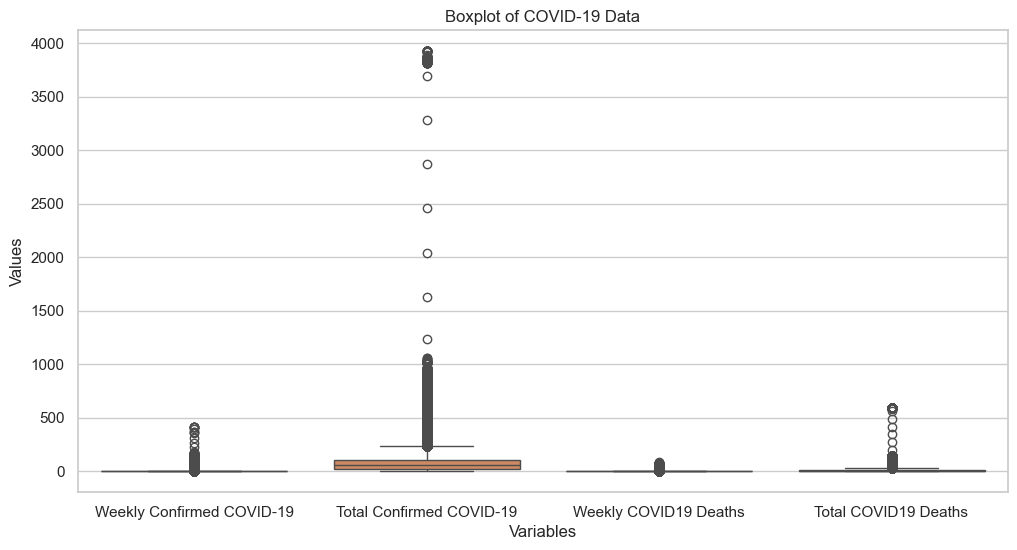

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_selected)
plt.title('Boxplot of COVID-19 Data')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()


Out of these four boxplots, the Total Confirmed COVID-19 boxplot shows the most outliers. This could be from sudden outbreaks especially in populated areas.

## Question 6

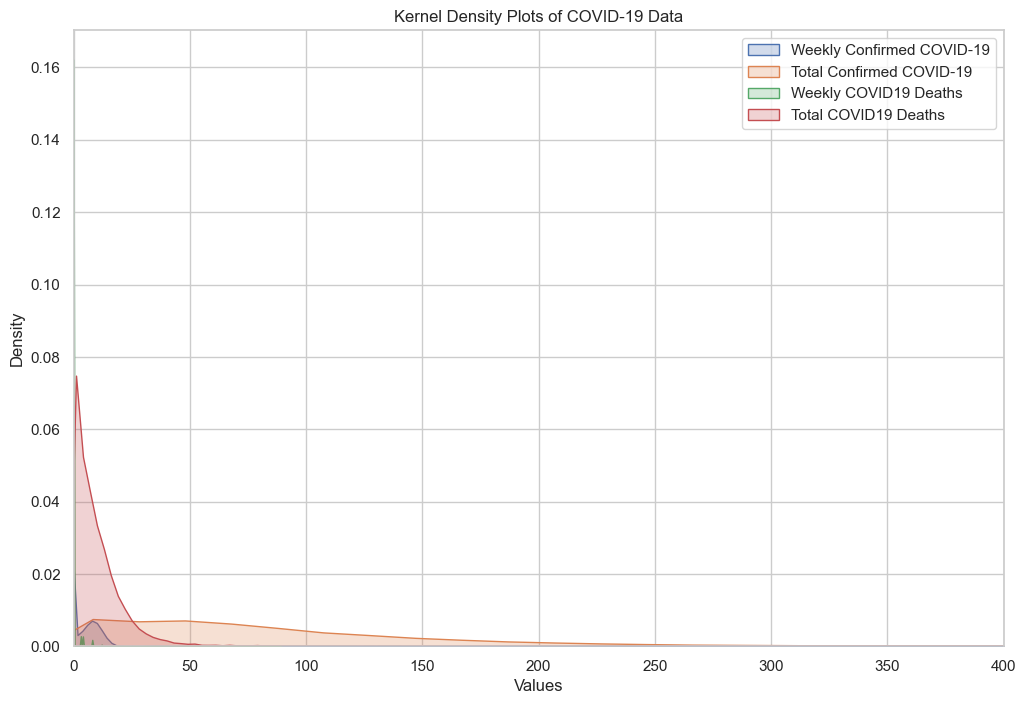

In [76]:
plt.figure(figsize=(12, 8))

for column in df_selected:
    sns.kdeplot(df_selected[column], label=column, fill=True)
    plt.xlim(0, 400)

plt.title('Kernel Density Plots of COVID-19 Data')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()


The distribution of **Total COVID-19 Deaths** is more concentrated within a narrower range. This suggests that most of the data points for total deaths are clustered within this range, indicating less variability. On the other hand, the **Total Confirmed COVID-19** cases have a wider distribution. This implies that the confirmed cases are more spread out and less concentrated, showing greater variability in the data. Essentially, the higher peak in deaths indicates a more consistent and predictable pattern, while the lower, broader peak in confirmed cases suggests more variation and spread in the data. The **Weekly COVID19 Deaths** suggests a significant number of weeks had few or no COVID19 deaths resulting in this sharp peak at the beginning.

I had to rescale the x axis to better view the graph.

## Question 7

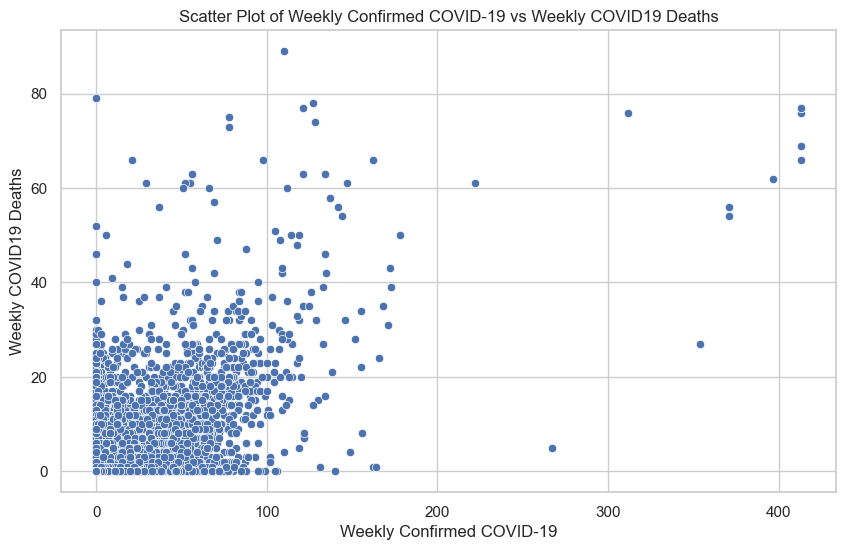

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_selected, x='Weekly Confirmed COVID-19', y='Weekly COVID19 Deaths')
plt.title('Scatter Plot of Weekly Confirmed COVID-19 vs Weekly COVID19 Deaths')
plt.xlabel('Weekly Confirmed COVID-19')
plt.ylabel('Weekly COVID19 Deaths')
plt.show()


In this scatterplot, there is somewhat of a positive correlation in the number of weekly confirmed COVID19 cases to the weekly COVID19 deaths. This means that the higher number of COVID19 cases correlates to higher weekly COVID19 related deaths.

## Question 8

In [78]:
summary_table = df_selected.describe()
print(summary_table)


       Weekly Confirmed COVID-19  Total Confirmed COVID-19  \
count               3.411897e+06              3.411897e+06   
mean                6.290987e-01              7.675146e+01   
std                 2.945233e+00              7.736891e+01   
min                 0.000000e+00              0.000000e+00   
25%                 0.000000e+00              2.400000e+01   
50%                 0.000000e+00              6.000000e+01   
75%                 0.000000e+00              1.090000e+02   
max                 4.130000e+02              3.924000e+03   

       Weekly COVID19 Deaths  Total COVID19 Deaths  
count           3.411897e+06          3.411897e+06  
mean            5.062228e-02          9.187542e+00  
std             5.388894e-01          1.205045e+01  
min             0.000000e+00          0.000000e+00  
25%             0.000000e+00          1.000000e+00  
50%             0.000000e+00          6.000000e+00  
75%             0.000000e+00          1.300000e+01  
max             8


The table presents a statistical summary of COVID-19 data, including weekly confirmed cases, total confirmed cases, weekly deaths, and total deaths. The dataset contains approximately 3.4 million records. On average, there are about 0.63 weekly confirmed cases and 76.75 total confirmed cases per record. The standard deviation for weekly confirmed cases is 2.95, indicating some variability, while the total confirmed cases have a higher standard deviation of 77.37. The maximum values observed are 413 for weekly confirmed cases and 3,924 for total confirmed cases. For deaths, the average weekly deaths are 0.05, with a standard deviation of 0.54, and the total deaths average is 9.19, with a standard deviation of 12.05. The maximum weekly deaths recorded are 89, and the maximum total deaths are 593. The data shows a wide range of values, reflecting the varying impact of COVID-19 across different records.